## https://www.kaggle.com/competitions/titanic/overview

### KOD:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

### Zmienne, ktróre są bezużyteczne w modelowaniu:

1. Zmienna jest monotoniczna (przyjmuje takie same wartości dla wszystkich obserwacji)
2. Zmienna jest unikalna (przyjmuje unikalne wartości dla każdej zmiennej)

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [6]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Zmienna celu (zmienna zależna):
Zmienna celu, znana również jako zmienna zależna, to zmienna, którą chcesz przewidzieć lub wyjaśnić. Jest to wynik, który chcesz zrozumieć lub przewidzieć.

Przetrwał czy nie (0 nie przeżył, a 1 przeżył)

## Zmienne niezależne:
Zmienne niezależne, zwane także zmiennymi predykcyjnymi, to zmienne używane do wyjaśniania lub przewidywania zmiennej celu.

Stanowią one dane wejściowe do modelu predykcyjnego i zakłada się, że wpływają na zmienną celu lub mają z nią związek.

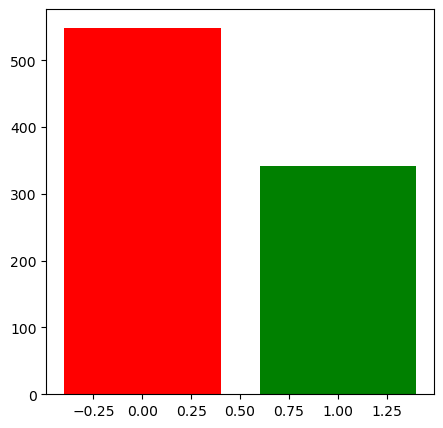

In [9]:
plt.figure(figsize=(5,5))

plt.bar(list(train_data["Survived"].value_counts().keys()),list(train_data["Survived"].value_counts()),color=["r","g"]);